In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

In [2]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.04501537],
       [2.82992565]])

In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.04501537],
       [9.70486667]])

Text(0.5,1,'Linear Prediction')

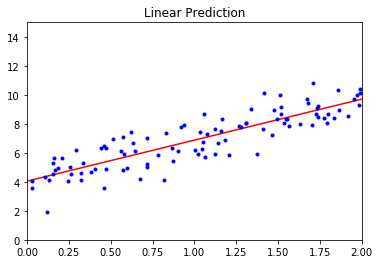

In [5]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.title('Linear Prediction')

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.04501537]), array([[2.82992565]]))

In [7]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

rate = np.zeros((1000,3))
theta = np.random.randn(2,1)
a=0

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) -y)
    theta = theta - eta*gradients    

In [8]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter = 50, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

C:\Users\princ\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.0096356]), array([2.8072053]))

In [16]:
m=100
X = 6*np.random.rand(m,1)-3
y=0.5 * X**2 + X + 2 + np.random.randn(m,1)

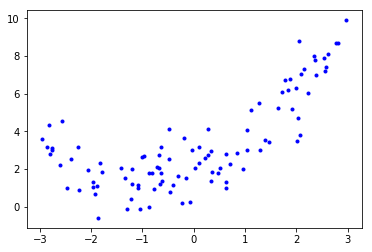

In [18]:
plt.plot(X,y,'b.')
plt.show()

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.01030438])

In [21]:
X_poly[0]

array([2.01030438, 4.04132372])

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.92297748]), array([[1.03207582, 0.50070577]]))

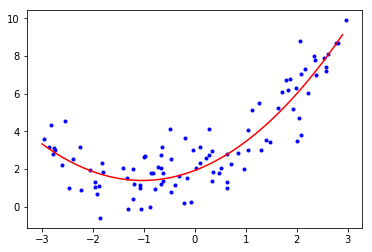

In [53]:
X_new = np.arange(-3,3,0.1).reshape((60,1))
X_new_poly = poly_features.fit_transform(X_new)
y_new_poly=X_new_poly.dot(lin_reg.coef_.T) + lin_reg.intercept_
plt.plot(X,y,'b.')
plt.plot(X_new,y_new_poly,'r-')

C:\Users\princ\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\princ\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\princ\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\princ\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning:

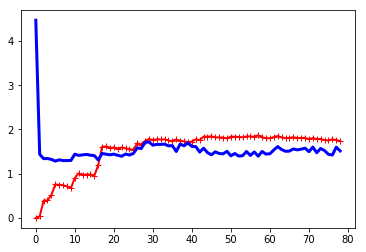

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val")
    
lin_reg = LinearRegression()
plot_learning_curves(sgd_reg,X,y)